In [24]:
import fluxions as fl
import numpy as np
import matplotlib.pyplot as plt
import optimization as flop

# Optimization with Fluxions

### Test Function

We will use the Rosenbrock function as a test function for our optimization suite:

$f(x,y) = 100(y-x^2)^2 + (1-x)^2$

In [2]:
def f(x):
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2
def df(x):
    return np.array([-400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0]),200*(x[1]-x[0]**2)])
def ddf(x):
    return np.array([[400*(3*x[0]**2-x[1]) + 2,-400*x[0]],[-400*x[0],200]])

### Countour Plot

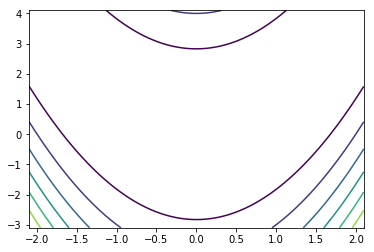

In [32]:
x = np.linspace(-2.1, 2.1, 1000)
y = np.linspace(-3.1, 4.1, 1000)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contour(X, Y, Z)#, colors='black');
plt.show()

### The function is steep, with sharp countours

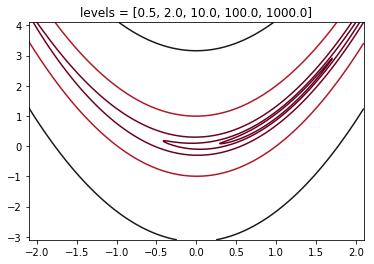

In [43]:
plt.figure()
levels = np.array([0.5,2,10,100,1000])
CS = plt.contour(X, Y, Z, levels=levels, cmap='RdGy')
plt.title('levels = {}'.format(levels.tolist()))
plt.show()

### Write the Rosenbrock function as a fluxion

In [4]:
x = fl.Var('x')
y = fl.Var('y')
F = 100*(y-x**2)**2 + (1-x)**2
dF = [-400*x*(y-x**2) - 2*(1-x),200*(y-x**2)] #we will use this later, for Newton's method

### Use the fluxion version of steepest descent with scipy.optimize.line_search and a limit of 2000 iterations

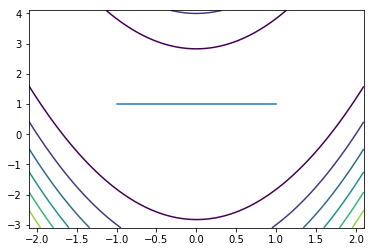

starting point = [-1, 1]
iterations = 2
stepsize = 0.0
minimum = [1. 1.]


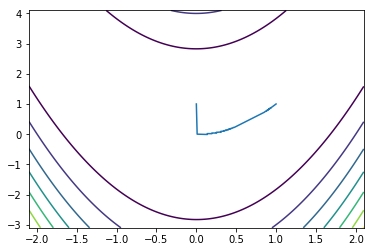

starting point = [0, 1]
iterations = 1571
stepsize = 9.782419804558578e-09
minimum = [0.99999956 0.99999914]


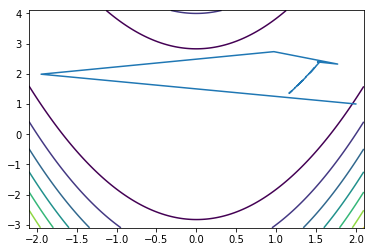

starting point = [2, 1]
iterations = 2000
stepsize = 0.00046291842657949665
minimum = [1.16610637 1.36025519]


In [27]:
points = [[-1, 1],[0, 1],[2, 1]]
for x in points:
    (xs,iterations,stepsize,minimum) = flop.steepest_descent(x,F)
    plt.plot(xs[:,0], xs[:,1])
    plt.contour(X, Y, Z)
    plt.show()
    print("starting point = " + str(x))
    print("iterations = " + str(iterations))
    print("stepsize = " + str(stepsize))
    print("minimum = " + str(minimum))

### Use the fluxion version of newton's method

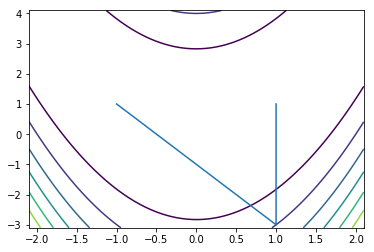

starting point = [-1, 1]
iterations = 2
stepsize = 7.854763168638575e-14
minimum = [1. 1.]


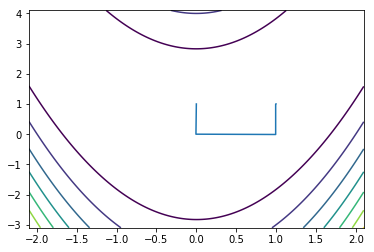

starting point = [0, 1]
iterations = 5
stepsize = 7.129738786932919e-12
minimum = [1. 1.]


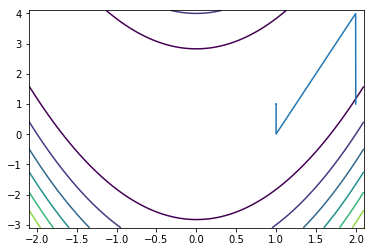

starting point = [2, 1]
iterations = 5
stepsize = 0.0
minimum = [1. 1.]


In [45]:
# points = [[-1, 1],[0, 1],[2, 1]]
for x in points:
    (xs,iterations,stepsize,minimum) = flop.newtons_method(np.array(x),F,dF)
    plt.plot(xs[:,0], xs[:,1])
    plt.contour(X, Y, Z)
    plt.xlim(-2.1, 2.1)
    plt.ylim(-3.1, 4.1)
    plt.show()
    print("starting point = " + str(x))
    print("iterations = " + str(iterations))
    print("stepsize = " + str(stepsize))
    print("minimum = " + str(minimum))

### Use the fluxion version of bfgs

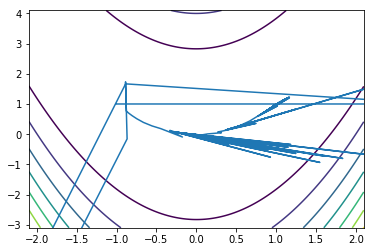

starting point = [-1, 1]
iterations = 124
stepsize = 3.2530067000084284e-10
minimum = [1. 1.]


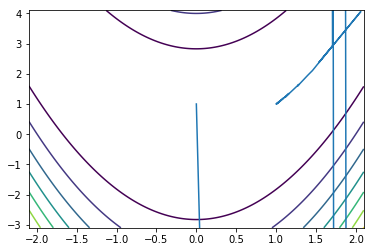

starting point = [0, 1]
iterations = 38
stepsize = 4.707735459783652e-12
minimum = [1. 1.]


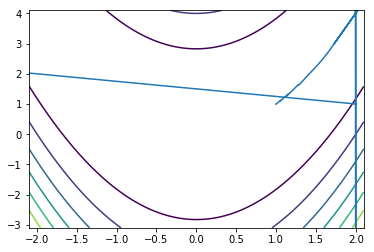

starting point = [2, 1]
iterations = 45
stepsize = 1.1140963971167481e-11
minimum = [1. 1.]


In [25]:
# points = [[-1, 1],[0, 1],[2, 1]]
for x in points:
    (xs,iterations,stepsize,minimum) = flop.bfgs(x,F)
    plt.plot(xs[:,0], xs[:,1])
    plt.contour(X, Y, Z)
    plt.xlim(-2.1, 2.1)
    plt.ylim(-3.1, 4.1)
    plt.show()
    print("starting point = " + str(x))
    print("iterations = " + str(iterations))
    print("stepsize = " + str(stepsize))
    print("minimum = " + str(minimum))